In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("FlightDelays.xls")

In [3]:
data.head(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
CRS_DEP_TIME     2201 non-null int64
CARRIER          2201 non-null object
DEP_TIME         2201 non-null int64
DEST             2201 non-null object
DISTANCE         2201 non-null int64
FL_DATE          2201 non-null datetime64[ns]
FL_NUM           2201 non-null int64
ORIGIN           2201 non-null object
Weather          2201 non-null int64
DAY_WEEK         2201 non-null int64
DAY_OF_MONTH     2201 non-null int64
TAIL_NUM         2201 non-null object
Flight Status    2201 non-null object
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 223.6+ KB


In [5]:
data.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64

## 종속변수 체크

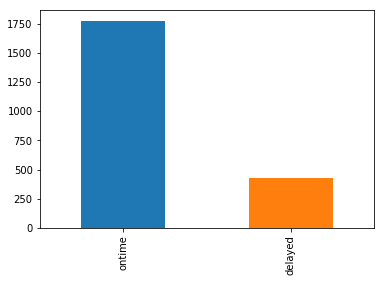

In [6]:
data["Flight Status"].value_counts().plot(kind="bar")

## 명목형 변수의 분포 살펴보기

In [7]:
category_feature = [col for col in data.columns if data[col].dtypes == "object"]
category_feature

['CARRIER', 'DEST', 'ORIGIN', 'TAIL_NUM', 'Flight Status']

In [8]:
category_feature = list(set(category_feature)-set(['Flight Status','TAIL_NUM']))
category_feature

['ORIGIN', 'CARRIER', 'DEST']

In [12]:
category_feature.append('Weather')

In [17]:
category_feature.append("FL_NUM")

In [18]:
category_feature.append("TAIL_NUM")

In [20]:
data["Weather"].value_counts()

0    2169
1      32
Name: Weather, dtype: int64

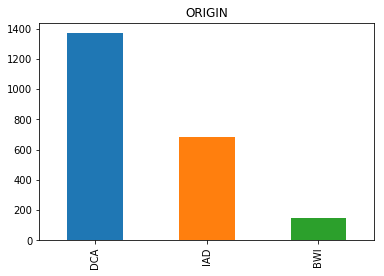

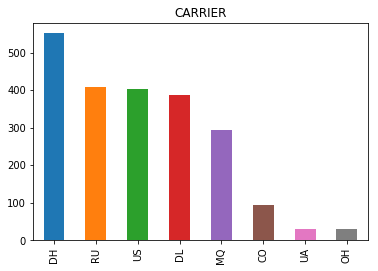

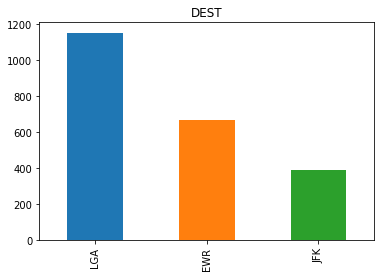

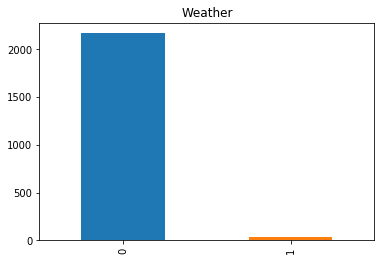

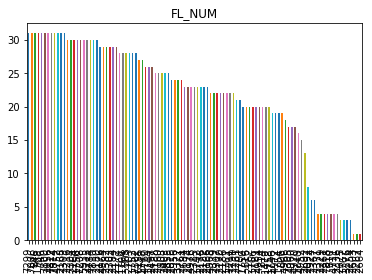

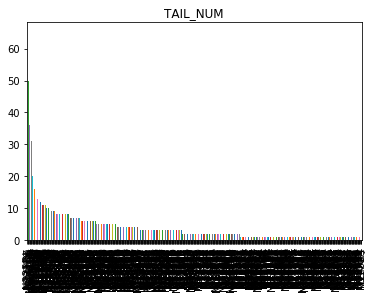

In [19]:
for col in category_feature:
    data[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.show()

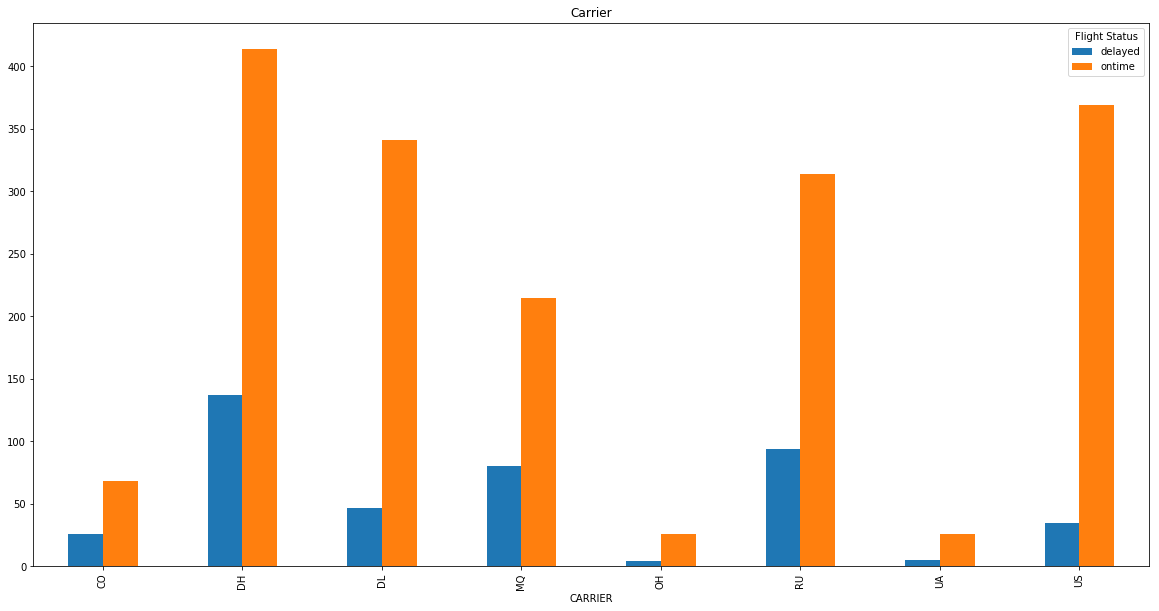

In [11]:
carrier_df = data.groupby(["CARRIER",'Flight Status'])['Flight Status'].count().unstack('Flight Status')
carrier_df.plot(kind='bar',figsize=(20,10))
plt.title('Carrier')
plt.show()

## 단변수 탐색

In [17]:
numerical_feature = list(set(data.columns)-set(category_feature)-set(['FL_DATE'])-set(['Flight Status','TAIL_NUM']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['CRS_DEP_TIME', 'DAY_OF_MONTH', 'DAY_WEEK', 'DEP_TIME', 'DISTANCE',
       'FL_NUM', 'Weather'], dtype='<U12')

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


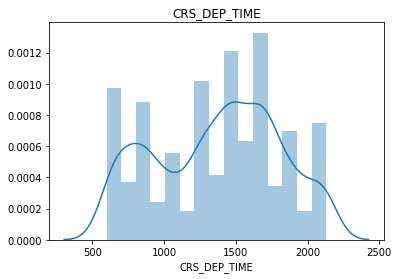

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


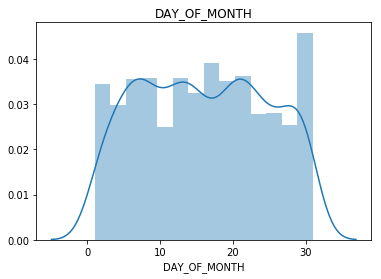

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


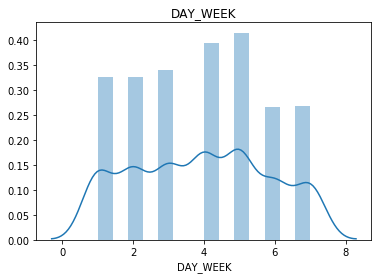

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


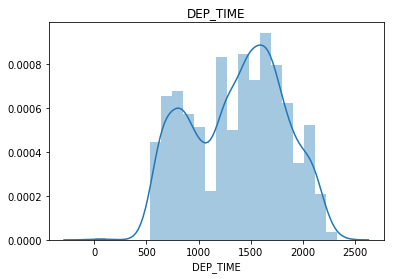

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


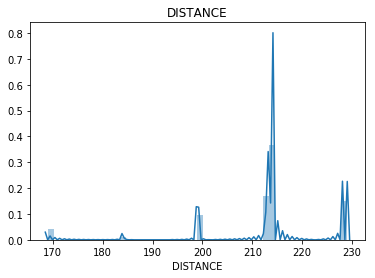

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


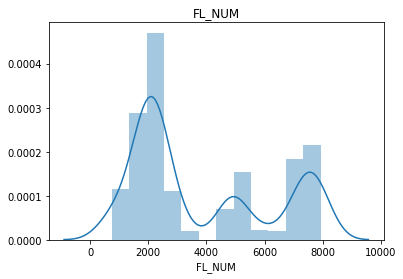

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


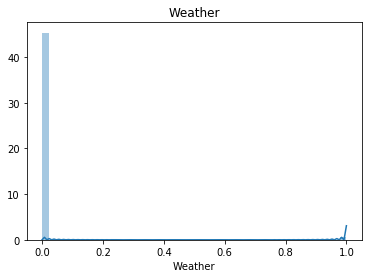

In [18]:
for col in numerical_feature:
    sns.distplot(data.loc[data[col].notnull(), col])
    plt.title(col)
    plt.show()

In [28]:
list = []
for i in range(len(data)):
    if data["Weather"][i] == 1:
        list = i
list
# 2101 에 weather 1 존재. 다른 값은 다 0 

2101

In [34]:
data1 = data

In [35]:
for i in range(len(data1)):
    if data1.loc[i,'Flight Status'] == "ontime":
        data1.loc[i,'Flight Status'] = 0
    else:
        data1.loc[i,'Flight Status'] = 1

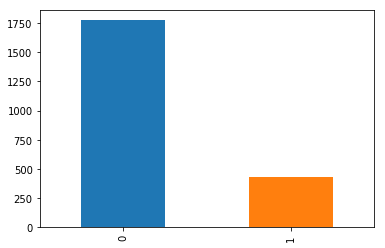

In [36]:
data["Flight Status"].value_counts().plot(kind="bar")

In [38]:
sns.pairplot(data1[numerical_feature.tolist()+["Flight Status"]],hue='Flight Status', x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

TypeError: 'int' object is not callable

In [61]:
data["Flight Status"].value_counts()

0    1773
1     428
Name: Flight Status, dtype: int64

In [68]:
for i in range(len(data)):
    if data["Weather"][i] == 0:
        print(data.loc[i,"Flight Status"])
        print(data.loc[i,"CRS_DEP_TIME"]-data.loc[i,"DEP_TIME"])
    else: 
        continue;

0
0
0
0
0
0
0
6
0
4
0
1
0
-3
0
1
0
5
0
-9
0
6
0
-3
0
-2
0
2
0
1
0
2
0
1
0
5
0
44
0
8
0
47
0
46
0
44
0
48
0
47
0
9
0
42
0
44
0
47
0
42
0
45
0
45
0
3
0
10
0
0
0
44
0
44
0
4
0
0
0
6
0
0
0
2
0
49
0
50
0
4
0
45
0
43
0
7
0
45
0
5
0
0
0
-1
0
-4
1
-76
0
3
0
-5
1
-197
0
-19
0
8
0
0
0
0
0
-1
1
-185
0
5
0
2
0
-3
0
0
0
0
0
3
0
0
0
2
0
8
0
48
0
-17
0
48
0
47
0
42
0
-2
0
44
0
0
0
43
0
43
0
42
0
42
0
42
0
45
0
45
0
44
0
5
0
0
0
44
0
-1
0
3
0
-1
0
5
0
3
1
-105
1
-82
0
1
0
5
0
45
0
42
0
43
0
50
0
44
0
47
0
46
0
42
0
50
0
42
1
5
0
6
0
2
0
-23
0
0
0
9
0
-15
0
3
0
0
0
-9
0
-26
1
-93
0
6
0
-18
1
-50
0
2
0
0
0
0
0
2
0
1
0
1
0
6
1
-70
0
45
0
1
0
45
0
46
0
1
0
45
0
42
0
41
0
44
0
0
0
42
0
43
0
6
0
45
0
4
0
7
0
45
1
-17
0
5
1
-84
0
-6
0
5
0
3
0
44
0
42
0
-11
0
-8
0
44
0
4
0
-3
1
-150
0
-4
0
-4
1
-80
1
-122
0
0
0
7
0
-60
0
-3
0
-49
0
3
0
6
0
0
0
3
0
4
0
-45
0
2
0
2
0
0
0
-2
0
1
0
-2
0
0
1
-4
0
46
0
-15
1
-28
0
43
1
42
0
41
1
-36
0
1
0
42
0
46
0
45
0
42
0
43
0
41
0
44
0
41
0
42
0
42
0
43
0
43
0
41
1
-160
1
-101


In [21]:
data.head(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


In [33]:
data['Time'] = ''

In [51]:
len(data.loc[5,"Time"])

2

In [52]:
len(data.loc[3,"Time"])

2

In [64]:
for i in range(len(data)):
    data.loc[i,"CRS_DEP_TIME"]=str(data.loc[i,'CRS_DEP_TIME'])

In [65]:
for i in range(len(data)):
    if len(data.loc[i,"CRS_DEP_TIME"]) == 3:
        data.loc[i,"Time"]=str(data.loc[i,'CRS_DEP_TIME'])[:1]
    else:
        data.loc[i,"Time"]=str(data.loc[i,'CRS_DEP_TIME'])[:2]

In [66]:
data.Time

0       14
1       16
2       12
3       17
4       10
5        8
6       12
7       16
8       17
9       21
10      21
11      14
12       9
13      12
14      14
15      17
16      20
17      15
18       6
19      18
20       9
21      13
22      14
23      15
24      19
25       8
26       9
27      11
28      13
29      15
        ..
2171    15
2172     6
2173    18
2174     9
2175    13
2176     8
2177     7
2178     9
2179    11
2180    13
2181    15
2182    17
2183    19
2184    10
2185    14
2186    17
2187     7
2188    13
2189     8
2190    17
2191    12
2192    21
2193    15
2194     9
2195     7
2196     6
2197    17
2198    16
2199    13
2200    17
Name: Time, Length: 2201, dtype: object

In [67]:
for i in range(len(data)):
    data.loc[i,"CRS_DEP_TIME"]=int(data.loc[i,'CRS_DEP_TIME'])

In [68]:
for i in range(len(data)):
    data.loc[i,"Time"]=int(data.loc[i,'Time'])

In [69]:
data.dtypes

CRS_DEP_TIME              int64
CARRIER                  object
DEP_TIME                  int64
DEST                     object
DISTANCE                  int64
FL_DATE          datetime64[ns]
FL_NUM                    int64
ORIGIN                   object
Weather                   int64
DAY_WEEK                  int64
DAY_OF_MONTH              int64
TAIL_NUM                 object
Flight Status            object
Time                      int64
dtype: object

In [90]:
sns.displot(data.loc[data["Time"].notnull(), "Time"])
plt.title('Time')
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

In [70]:
data['Time'].describe()

count    2201.000000
mean       13.516129
std         4.349696
min         6.000000
25%        10.000000
50%        14.000000
75%        17.000000
max        21.000000
Name: Time, dtype: float64

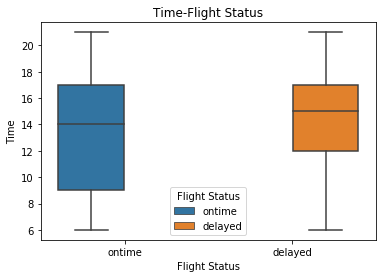

In [75]:
sns.boxplot(x="Flight Status",y="Time", hue="Flight Status", data=data)
plt.title("Time-Flight Status")
plt.show()

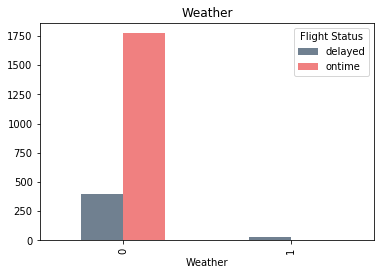

In [87]:
colors = ['slategrey','lightcoral']
weather = data.groupby(["Weather",'Flight Status'])['Flight Status'].count().unstack('Flight Status')
weather.plot(kind='bar', color=colors)
plt.title('Weather')
plt.show()

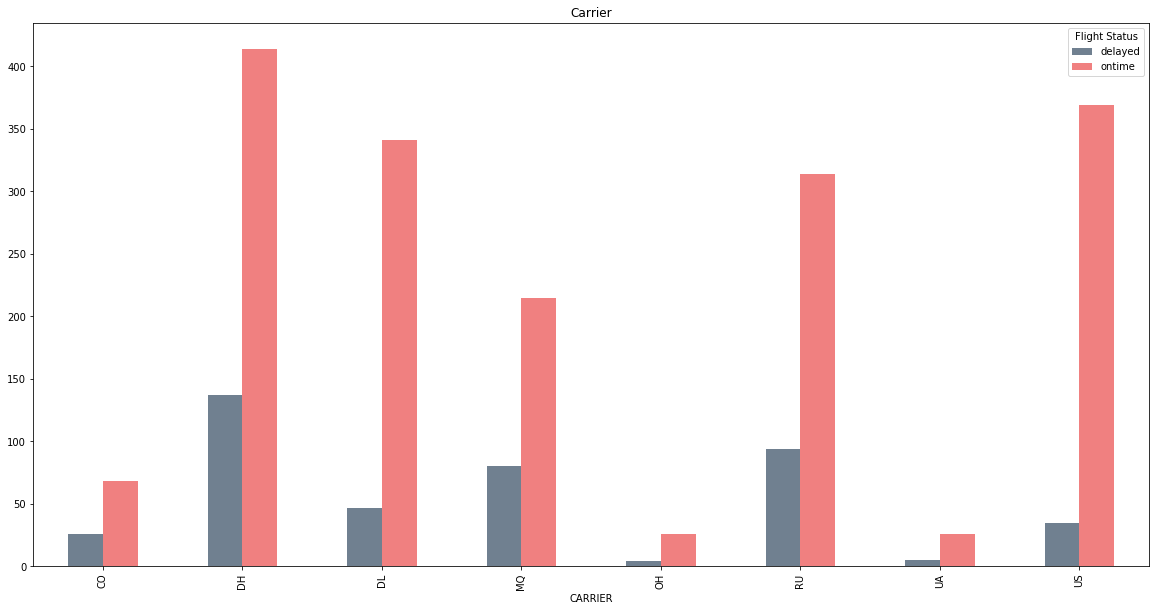

In [131]:
carrier_df = data.groupby(["CARRIER",'Flight Status'])['Flight Status'].count().unstack('Flight Status')
carrier_df.plot(kind='bar',figsize=(20,10),color=colors)
plt.title('Carrier')
plt.show()

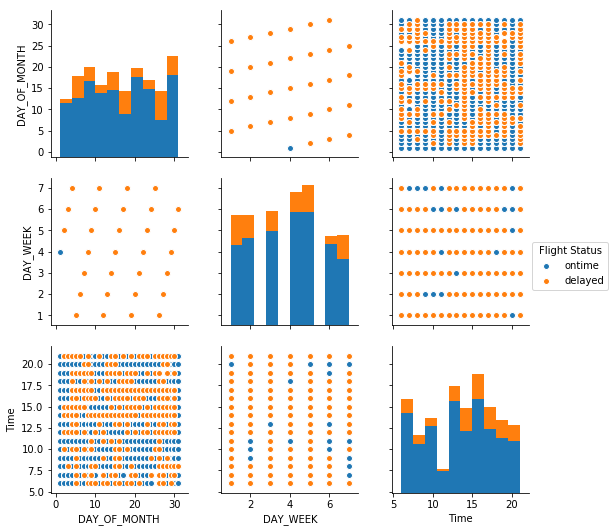

In [100]:
time = ['Time','DAY_WEEK','DAY_OF_MONTH']
time= np.sort(time)
sns.pairplot(data[list(time)+['Flight Status']], hue='Flight Status',x_vars=time, y_vars=time)

In [91]:
data.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status', 'Time'],
      dtype='object')

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


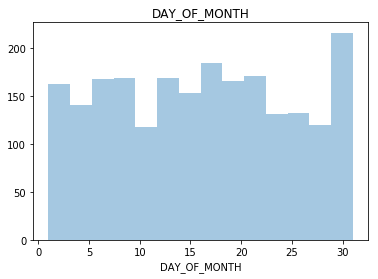

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


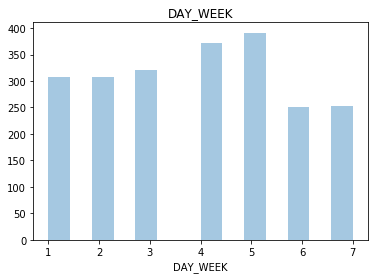

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


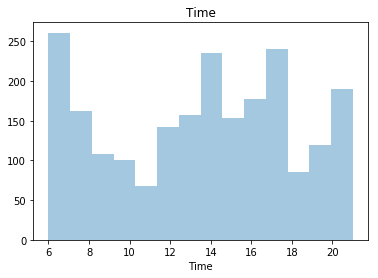

In [106]:
for col in time:
    sns.distplot(data.loc[data[col].notnull(), col],hist=True, kde=False, rug=False)
    plt.title(col)
    plt.show()

In [110]:
sns.distplot(data[data.Flight Status == 1]["Time"],
           color='blue',label="delayed")
sns.distplot(data[data.Flight Status == 0]["Time"],
           color='green',label="delayed")

SyntaxError: invalid syntax (<ipython-input-110-755fb782ec04>, line 1)

In [111]:
data.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status', 'Time'],
      dtype='object')

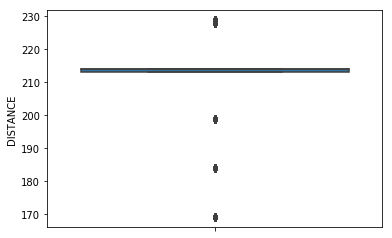

In [112]:
sns.boxplot(y="DISTANCE",data=data)

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


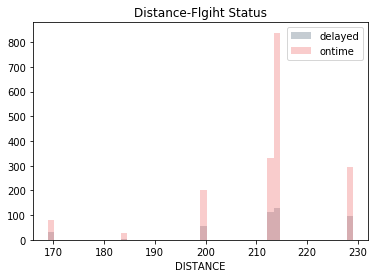

In [132]:
sns.distplot(data['DISTANCE'][data["Flight Status"]=="delayed"],kde=False,color='slategrey')
sns.distplot(data['DISTANCE'][data["Flight Status"]=="ontime"],kde=False,color="lightcoral")
plt.title("Distance-Flgiht Status")
plt.legend(['delayed',"ontime"])
plt.show()

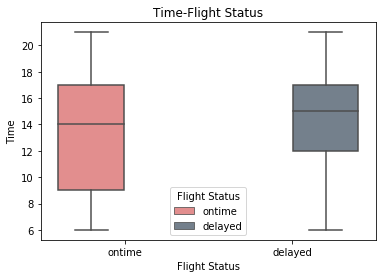

In [137]:
sns.boxplot(x="Flight Status",y="Time", hue="Flight Status", data=data,palette=['lightcoral','slategrey'])
plt.title("Time-Flight Status")
plt.show()

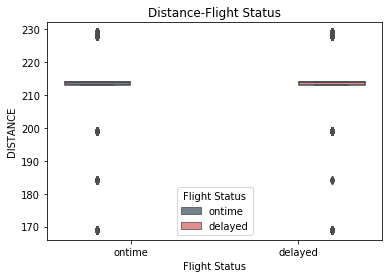

In [136]:
sns.boxplot(x="Flight Status",y="DISTANCE", hue="Flight Status", data=data,palette=colors)
plt.title("Distance-Flight Status")
plt.show()

In [138]:
### Time DISTANCE Weather CARRIER -  Parallel Coordinates plot 그리기 

In [145]:
df = data.corr()
df

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,Time
CRS_DEP_TIME,1.000000,0.983523,0.062368,0.086920,-0.008266,0.051766,0.002324,0.999057
DEP_TIME,0.983523,1.000000,0.057680,0.105660,0.019001,0.051868,0.000132,0.980713
DISTANCE,0.062368,0.057680,1.000000,0.421937,0.033104,-0.020926,0.010121,0.061507
FL_NUM,0.086920,0.105660,0.421937,1.000000,0.042076,0.018604,-0.009268,0.076892
Weather,-0.008266,0.019001,0.033104,0.042076,1.000000,-0.123636,0.144034,-0.009179
DAY_WEEK,0.051766,0.051868,-0.020926,0.018604,-0.123636,1.000000,0.015914,0.049822
DAY_OF_MONTH,0.002324,0.000132,0.010121,-0.009268,0.144034,0.015914,1.000000,0.001766
Time,0.999057,0.980713,0.061507,0.076892,-0.009179,0.049822,0.001766,1.000000


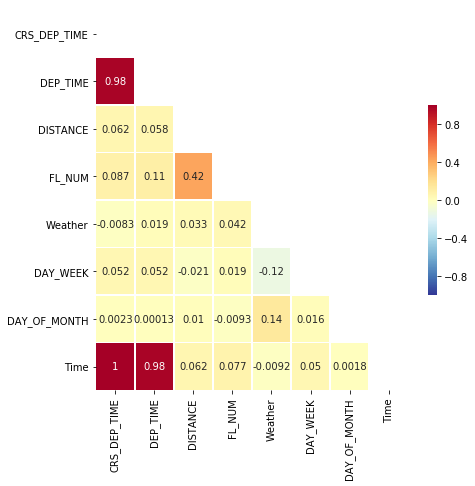

In [168]:
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


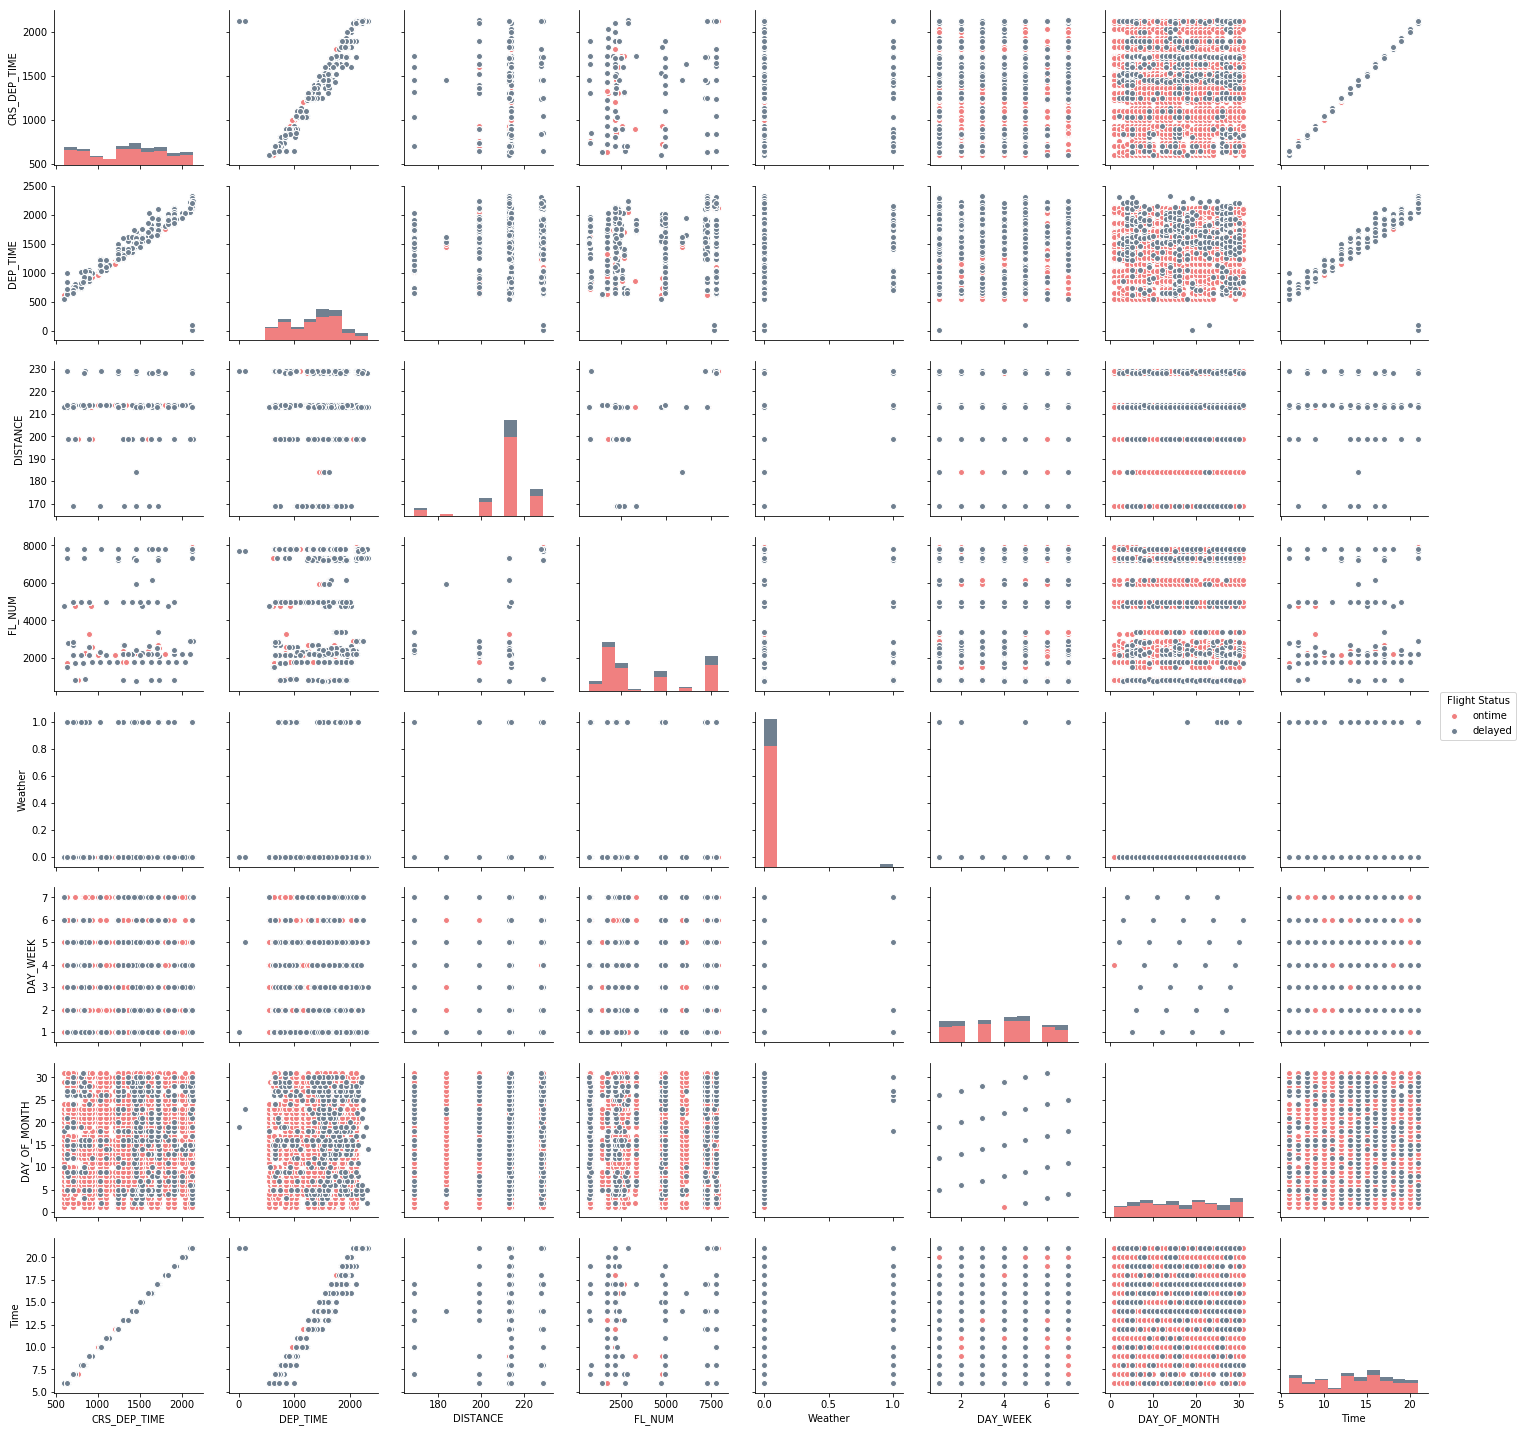

In [173]:
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.pairplot(data,diag_kind='hist',hue="Flight Status",palette=['lightcoral','slategrey'])

In [184]:
data_sample = data.loc[:,["CRS_DEP_TIME","DEP_TIME", 'DISTANCE', "FL_DATE",'DAY_WEEK', 'DAY_OF_MONTH','Flight Status']]

In [185]:
data_sample.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_DATE,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,1455,1455,184,2004-01-01,4,1,ontime
1,1640,1640,213,2004-01-01,4,1,ontime
2,1245,1245,229,2004-01-01,4,1,ontime
3,1715,1709,229,2004-01-01,4,1,ontime
4,1039,1035,229,2004-01-01,4,1,ontime


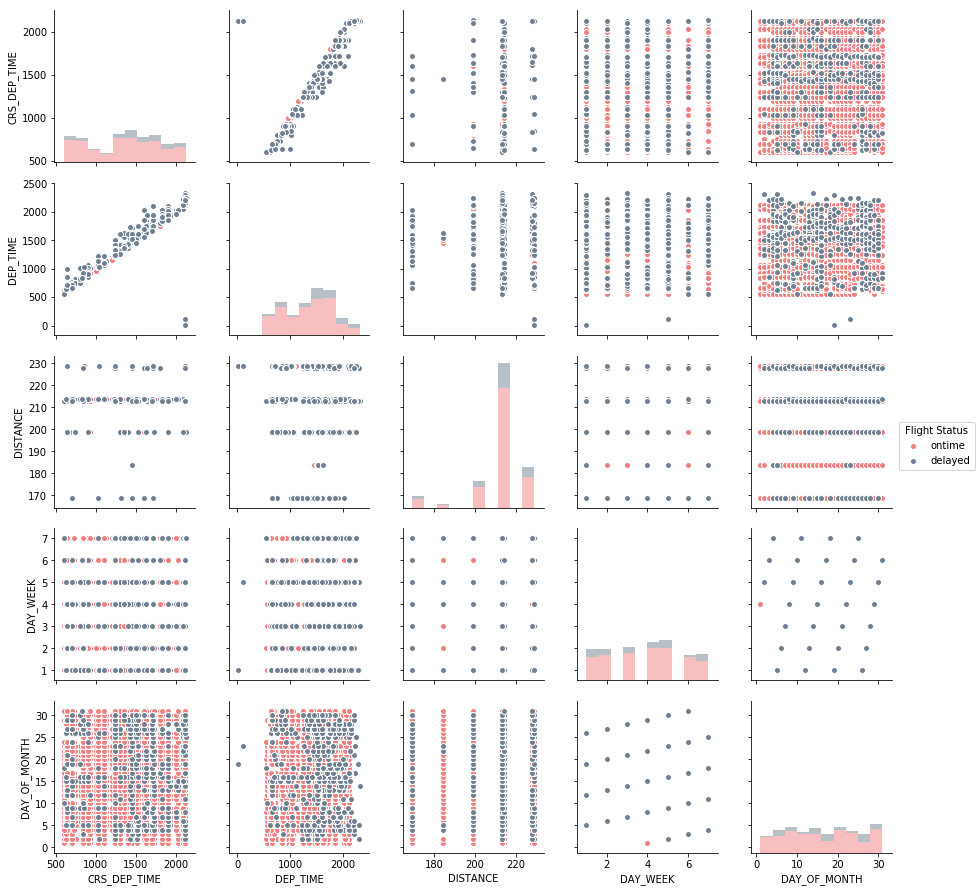

In [183]:
sns.pairplot(data_sample,diag_kind='hist',hue="Flight Status",palette=['lightcoral','slategrey'],diag_kws={'alpha':0.5})